# Data vizualisation for the report

In [1]:
import pandas as pd 
import numpy as np
import random

# import for data visualization
import matplotlib.pyplot as plt
import plotly.express as px

import seaborn as sns
import plotly.graph_objects as go 

In [29]:
# Import dataframe
df = pd.read_parquet("data/base.parquet", engine="pyarrow")  # Entire dataset
df_sample = pd.read_csv('.\sample_data.csv', header=0)  # This dataset is a sample of the whole dataset

In [15]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5899 entries, 0 to 5898
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SID           5899 non-null   object 
 1   SEASON        5899 non-null   int64  
 2   ISO_TIME      5899 non-null   object 
 3   NATURE        5899 non-null   object 
 4   LAT           5899 non-null   float64
 5   LON           5899 non-null   float64
 6   DIST2LAND     5899 non-null   int64  
 7   LANDFALL      5849 non-null   float64
 8   TD9636_STAGE  5899 non-null   int64  
 9   STORM_SPEED   5899 non-null   float64
 10  STORM_DIR     5899 non-null   float64
 11  WIND          5428 non-null   float64
 12  WIND_AGENCY   5428 non-null   object 
 13  PRESS         3632 non-null   float64
dtypes: float64(7), int64(3), object(4)
memory usage: 645.3+ KB


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45025 entries, 0 to 67409
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SEASON        45025 non-null  object 
 1   BASIN         45025 non-null  object 
 2   NATURE        45025 non-null  object 
 3   LAT           45025 non-null  float64
 4   LON           45025 non-null  float64
 5   WIND          45025 non-null  float64
 6   DIST2LAND     45025 non-null  int64  
 7   STORM_SPEED   45025 non-null  float64
 8   STORM_DIR     45025 non-null  float64
 9   TD9636_STAGE  45025 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.8+ MB


In [44]:
# custom palette for all the graphs:
custom_color = {
    '0': '#440154',
    '1': '#46327e',
    '2': '#365c8d',
    '3': '#277f8e',
    '4': '#1fa187',
    '5': '#4ac16d',
    '6': '#a0da39',    
    '7': '#fde725'
} 


In [80]:
# map the TD9636_STAGE to their name
stage = {
    '0': '0: Tropical disturbance',
    '1': '1: Depression',
    '2': '2: Storm',
    '3': '3: Cyclonic storm',
    '4': '4: Hurricane',
    '5': '5: Extratropical',
    '6': '6: Dissipating',    
    '7': '7: Unknown'
} 

## Dataset

Categorical => OneHotEncoder or one dimension with different values (1, 2, 3, 4, etc.)
- SEASON (4 classes)
- BASIN (7 classes)
- NATURE (6 classes)

Numeric => everything between 0 and 1
- LAT
- LON
- WIND 
- DIST2LAND
- STORM_SPEED
- STORM_DIR

## Exploratory analysis

##  Map of (some of) the cyclone

In [ ]:
df_sample["TD9636_STAGE"] = df_sample["TD9636_STAGE"].astype(str)  # Ensure categorical representation
# Define custom order
category_order = sorted(df_sample["TD9636_STAGE"].unique(), key=lambda x: int(x))  # Sort numerically


fig = px.scatter_geo(
     df_sample,
     lat="LAT",  
     lon="LON",  
     color="TD9636_STAGE",  # Color markers based on cyclone stage
     category_orders= {"TD9636_STAGE": category_order},  # Custom order
     color_discrete_map=custom_color, 
     projection="natural earth"  # Map projection type
 )

# Customize marker to add a white circle around the dot
fig.update_traces(
    marker=dict(
        line=dict(
            color='white',  # Color of the circle
            width=0.4  # Width of the circle around the marker
        )
    )
)

 # Customize layout (optional)
fig.update_layout(
 #    title="Cyclone over the earth",
     geo=dict(
         showland=True,  # Show land on the map
         landcolor="lightgray",  # Land color
         showcountries=True,  # Show country borders
         countrycolor="black"  # Country border color
     )
 )

# Update the legend with custom labels
fig.for_each_trace(lambda t: t.update(name=stage[t.name]))  # Update legend names

# add graticules
fig.update_geos(lataxis_showgrid=True, 
                lataxis_dtick=30, 
                lonaxis_showgrid=True)


fig.update_layout(
    height=750,
    legend = dict(
        x=0.8,
        y=0.97,
        bordercolor="Black",
        borderwidth=1
    )

)
 # Show the figure
fig.show()

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 14)

## Boxplot 

### Wind

In [30]:
df["TD9636_STAGE"] = df["TD9636_STAGE"].astype(float).astype(int)
df.dtypes

SEASON           object
BASIN            object
NATURE           object
LAT             float64
LON             float64
WIND            float64
DIST2LAND         int64
STORM_SPEED     float64
STORM_DIR       float64
TD9636_STAGE      int32
dtype: object

C:\Users\Claire\AppData\Local\Temp\ipykernel_11044\782513861.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\Claire\AppData\Local\Temp\ipykernel_11044\782513861.py:31: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\Claire\AppData\Local\Temp\ipykernel_11044\782513861.py:31: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\Claire\AppData\Local\Temp\ipykernel_11044\782513861.py:31: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same

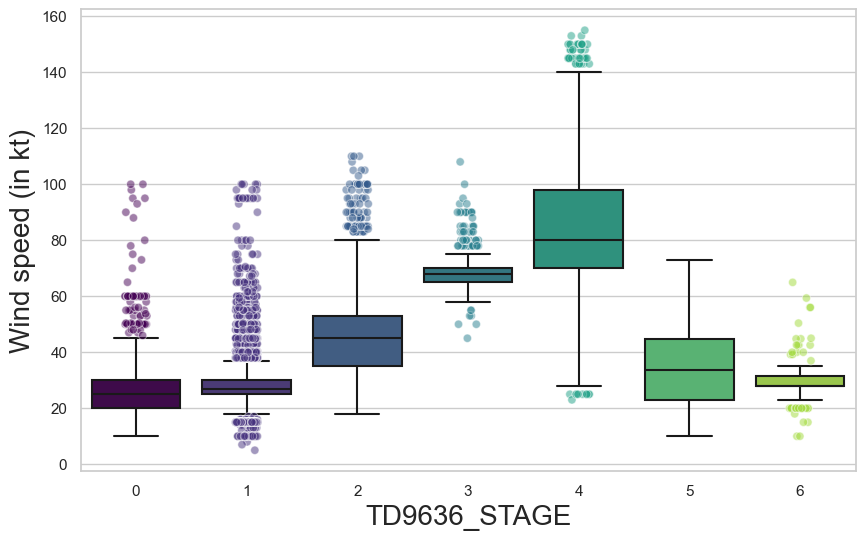

In [74]:
sns.set_theme(style = "whitegrid")

# configure figure size:
fig, ax = plt.subplots(figsize = (10, 6))

sns.boxplot(x = "TD9636_STAGE", 
            y = "WIND", 
            data = df, 
            palette = custom_color,   
            linewidth=1.5,  # Border width of boxes
            showfliers=False,  # Hide outliers
            ax = ax
            
            )

# Manually extract and plot **only the outliers**
for stage in df["TD9636_STAGE"].unique():
    subset = df[df["TD9636_STAGE"] == stage]
    
    # Compute IQR (Interquartile Range) for outlier detection
    Q1 = subset["WIND"].quantile(0.25)
    Q3 = subset["WIND"].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Select only outliers
    outliers = subset[(subset["WIND"] < lower_bound) | (subset["WIND"] > upper_bound)]
    
    # Plot outliers with matching color
    sns.stripplot(
        x=outliers["TD9636_STAGE"], 
        y=outliers["WIND"], 
        palette=custom_color,  # Assign color based on stage
        marker='o',  
        alpha=0.5,  # Slight transparency
        size=6,  # Dot size
        edgecolor="white",  # Black border around dots
        linewidth=0.7,  
        ax=ax
    )

ax.set_xlabel("TD9636_STAGE", fontsize = 20) # x axis label
ax.set_ylabel("Wind speed (in kt)", fontsize = 20) # y axis label

# Show the figure
plt.show()

### Dist2land

C:\Users\Claire\AppData\Local\Temp\ipykernel_11044\1151153582.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\Claire\AppData\Local\Temp\ipykernel_11044\1151153582.py:31: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\Claire\AppData\Local\Temp\ipykernel_11044\1151153582.py:31: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\Claire\AppData\Local\Temp\ipykernel_11044\1151153582.py:31: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the 

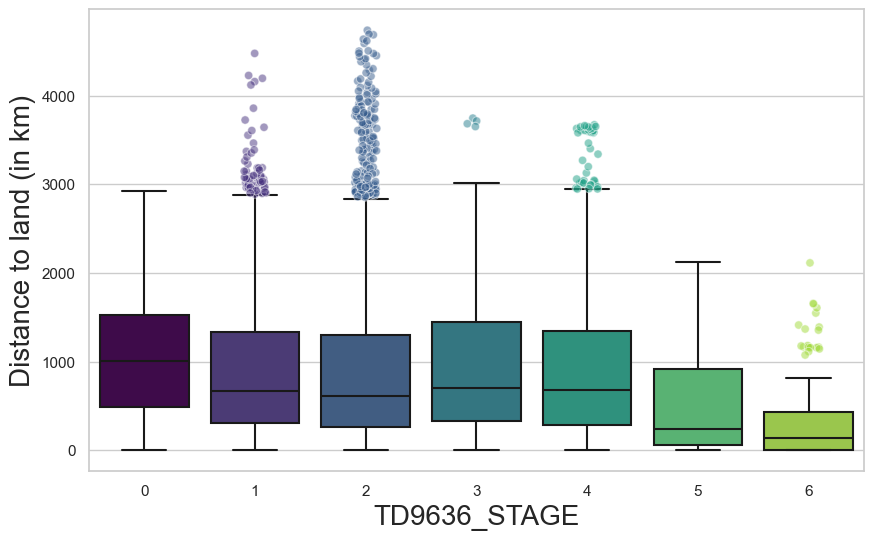

In [75]:
sns.set_theme(style = "whitegrid")

# configure figure size:
fig, ax = plt.subplots(figsize = (10, 6))

sns.boxplot(x = "TD9636_STAGE", 
            y = "DIST2LAND", 
            data = df, 
            palette = custom_color,   
            linewidth=1.5,  # Border width of boxes
            showfliers=False,  # Hide outliers
            ax = ax
            
            )

# Manually extract and plot **only the outliers**
for stage in df["TD9636_STAGE"].unique():
    subset = df[df["TD9636_STAGE"] == stage]
    
    # Compute IQR (Interquartile Range) for outlier detection
    Q1 = subset["DIST2LAND"].quantile(0.25)
    Q3 = subset["DIST2LAND"].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Select only outliers
    outliers = subset[(subset["DIST2LAND"] < lower_bound) | (subset["DIST2LAND"] > upper_bound)]
    
    # Plot outliers with matching color
    sns.stripplot(
        x=outliers["TD9636_STAGE"], 
        y=outliers["DIST2LAND"], 
        palette=custom_color,  # Assign color based on stage
        marker='o',  
        alpha=0.5,  # Slight transparency
        size=6,  # Dot size
        edgecolor="white",  # Black border around dots
        linewidth=0.7,  
        ax=ax
    )

ax.set_xlabel("TD9636_STAGE", fontsize = 20) # x axis label
ax.set_ylabel("Distance to land (in km)", fontsize = 20) # y axis label

# Show the figure
plt.show()